In [49]:
#岭回归是改良的最小二乘法，通过减少特征变量可以避免过拟合现象，减小特征变量的系数
#以波士顿房价数据集为例
#导入模型，数据集和拆分函数
from sklearn.linear_model import Ridge
#from sklearn.datasets import load_boston
#from sklearn.model_selection import train_test_split


#boston_dataset=load_boston()

#定义X，y取值即模型的特征值和目标
#X,y=boston_dataset().data,boston_dataset().target
#拆分为训练和测试数据
'''
有一个比较奇怪的现象是当我没有对X，y做任何处理时会报错：
Found input variables with inconsistent numbers of samples: [379, 127]
是因为样本的特征量和target值不一致，后来在网上找到一个处理办法，在train_test_split中
加入一个参数叫test_size=0.5时可以运行通过但是评分很低0.05,默认是0.25
X_train,y_train,X_test,y_test=train_test_split(X,y,random_state=8)
'''

from sklearn.datasets import load_diabetes

diabetes_dataset=load_diabetes()

X,y=load_diabetes().data,load_diabetes().target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)

#ld=load_boston(return_X_y=False)
#X=ld['data']
#y=ld['target']
#X_train,y_train,X_test,y_test=train_test_split(X,y,random_state=8)

print(X_train.shape)
print(y_train.shape)

#使用岭回归线对数据进行拟合
ridge=Ridge().fit(X_train,y_train)

print('======')
print('岭回归线训练数据集得分：{:.2f}'.format(ridge.score(X_train,y_train)))
print('岭回归线测试数据集得分：{:.2f}'.format(ridge.score(X_test,y_test)))


(331, 10)
(331,)
岭回归线训练数据集得分：0.43
岭回归线测试数据集得分：0.43


加上alpha参数为10后，训练数据集的得分：0.15
加上alpha参数为10后，测试数据集的得分：0.16
加上alpha参数为0.1后，训练数据集的得分：0.52
加上alpha参数为0.1后，测试数据集的得分：0.47


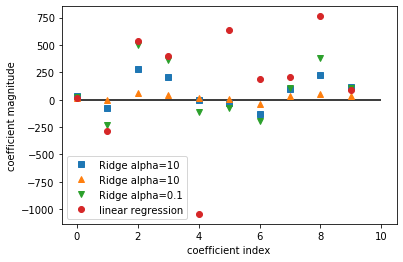

In [66]:
#岭回归模型中alpha值对模型泛化的影响，alpha越小，泛化约强，越可能出现过拟合；一般提高alpha值来减小过拟合
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve,KFold


diabetes_dataset=load_diabetes()

X,y=load_diabetes().data,load_diabetes().target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)

lr=LinearRegression().fit(X_train,y_train)

print('==================')
#上述例子中linear其实出现了轻微的过拟合现象，加上alpha值后尼
ridge10=Ridge(alpha=10).fit(X_train,y_train)

print('加上alpha参数为10后，训练数据集的得分：{:.2f}'.format(ridge10.score(X_train,y_train)))
print('加上alpha参数为10后，测试数据集的得分：{:.2f}'.format(ridge10.score(X_test,y_test)))

print('==================')

ridge01=Ridge(alpha=0.1).fit(X_train,y_train)

print('加上alpha参数为0.1后，训练数据集的得分：{:.2f}'.format(ridge01.score(X_train,y_train)))
print('加上alpha参数为0.1后，测试数据集的得分：{:.2f}'.format(ridge01.score(X_test,y_test)))

#使用图形将alpha值对coef的影响的图片画出来

plt.plot(ridge.coef_,'s',label='Ridge alpha=10')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')


plt.plot(lr.coef_,'o',label='linear regression')


plt.xlabel('coefficient index')

plt.ylabel('coefficient magnitude')

plt.hlines(0,0,len(lr.coef_))

plt.legend()

#以下探索在固定alpha值的时候，数据集的大小变化的评分图




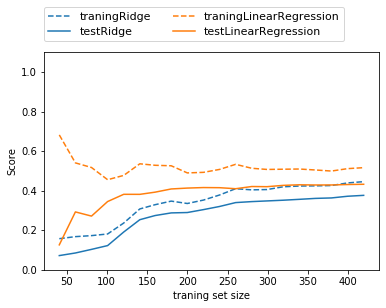

In [68]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve,KFold




def plot_learning_curve(est,X,y):
    training_set_size,train_score,test_scores=learning_curve(est,X,y,train_sizes=np.linspace(.1,1,20),cv=KFold(20,shuffle=True))
    estimator_name=est.__class__.__name__
    line=plt.plot(training_set_size,train_score.mean(axis=1),'--',label='traning'+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1),'-',
            label='test'+estimator_name,c=line[0].get_color())
    plt.xlabel('traning set size')
    plt.ylabel('Score')
    plt.ylim(0,1.1)
    
plot_learning_curve(Ridge(alpha=1),X,y)
plot_learning_curve(LinearRegression(),X,y)
plt.legend(loc=(0,1.05),ncol=2,fontsize=11)
    


In [77]:
#除了岭回归外，线性回归还有一种模型是套索回归（lasso），是通过忽略一些模型来处理，即有的特征变量系数几乎是0
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np

#使用lasso模型拟合数据集
lasso=Lasso().fit(X_train,y_train)

print('the result is:')

#查看lasso模型训练和测试数据集的得分
print('score of lasso model in train data:{:.2f}'.format(lasso.score(X_train,y_train)))

print('score of lasso model in test data:{:.2f}'.format(lasso.score(X_test,y_test)))

#查看lasso回归模型使用到的特征数量
print('features userd in lasso model:{:.2f}'.format(np.sum(lasso.coef_!=0)))

print('===========')

#由得分可以看出lasso回归出现了欠拟合现象，lasso模型也有alpha值可以通过减小alpha值来减小欠拟合的现象，同时可以增大最大迭代次数max_ite

lasso01=Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)

print('score of lasso01 model with max_ite in train data:{:.2f}'.format(lasso01.score(X_train,y_train)))

print('score of lasso01 model with max_ite in test data:{:.2f}'.format(lasso01.score(X_test,y_test)))

print('features userd in lasso01 with max_ite model:{:.2f}'.format(np.sum(lasso01.coef_!=0)))

#可以看到欠拟合的现象得到了改善



the result is:
score of lasso model in train data:0.36
score of lasso model in test data:0.37
features userd in lasso model:3.00
score of lasso01 model with max_ite in train data:0.52
score of lasso01 model with max_ite in test data:0.48
features userd in lasso01 with max_ite model:7.00
